# Recommended - Engine

## Importing Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv('C:/Users/hp/Desktop/DS Assignment ExcelR - Anas/10 - Recommendation System/Data/book (1).csv', encoding='Latin1')
books

,Unnamed: 0,user_id,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
books.head()

,Unnamed: 0,user_id,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


### Removing unnecessary columns

In [4]:
books=books.iloc[:,1:]

In [5]:
books

,user_id,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
print('Number of Unique Users are {}'.format(len(books['user_id'].unique())))

Number of Unique Users are 2182


In [7]:
print('Number of Unique Books are {}'.format(len(books['title'].unique())))

Number of Unique Books are 9659


In [8]:
books['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [9]:
books['user_id'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  int64 
 1   title    10000 non-null  object
 2   rating   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [11]:
books.rating.describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: rating, dtype: float64

In [12]:
books.describe()

,user_id,rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [13]:
books.isnull().any()

user_id    False
title      False
rating     False
dtype: bool

In [14]:
books.isnull().sum()

user_id    0
title      0
rating     0
dtype: int64

In [15]:
books.duplicated().sum()

2

In [16]:
books[books.duplicated()].shape

(2, 3)

In [17]:
books[books.duplicated()]

,user_id,title,rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [18]:
books.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: rating, dtype: float64

In [19]:
books.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: rating, dtype: int64

In [20]:
ratings = pd.DataFrame(books.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [21]:
ratings['num of ratings'] = pd.DataFrame(books.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


# Data Visualization

<AxesSubplot:>

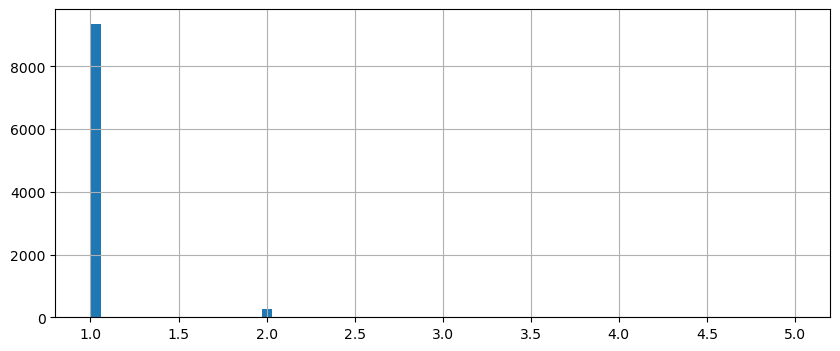

In [22]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

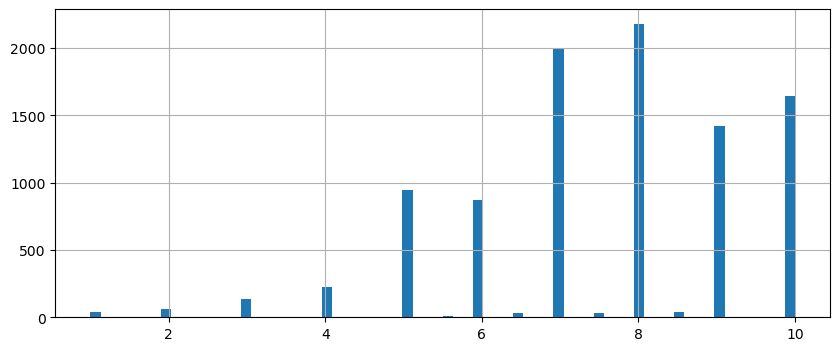

In [23]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

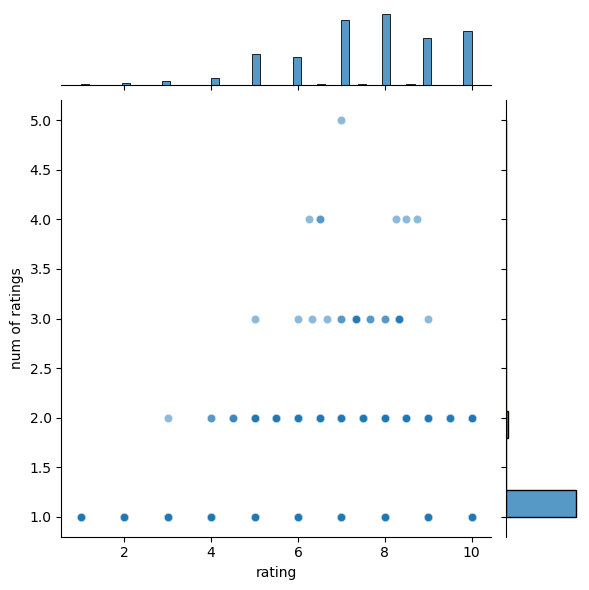

In [24]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Text(0.5, 1.0, 'Ratings Frequency')

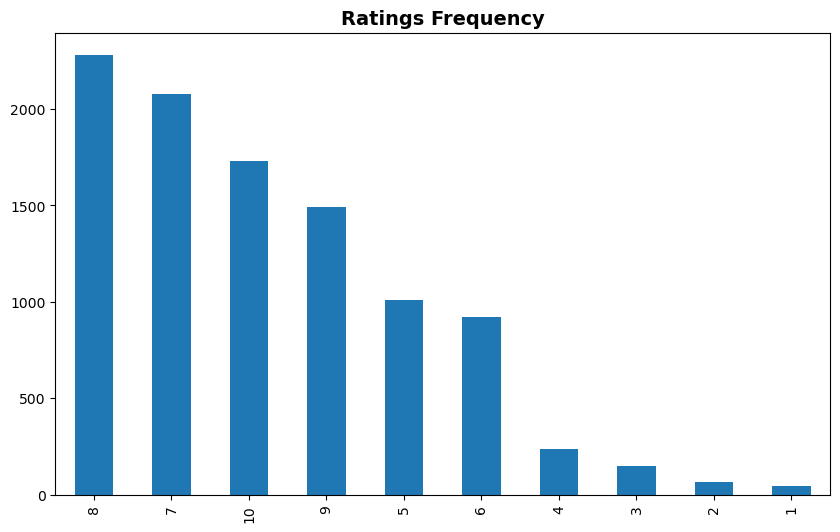

In [25]:
plt.figure(figsize=(10,6))
books['rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 14, fontweight = 'bold')

## Observations:

In [26]:
top_books = books['title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object')

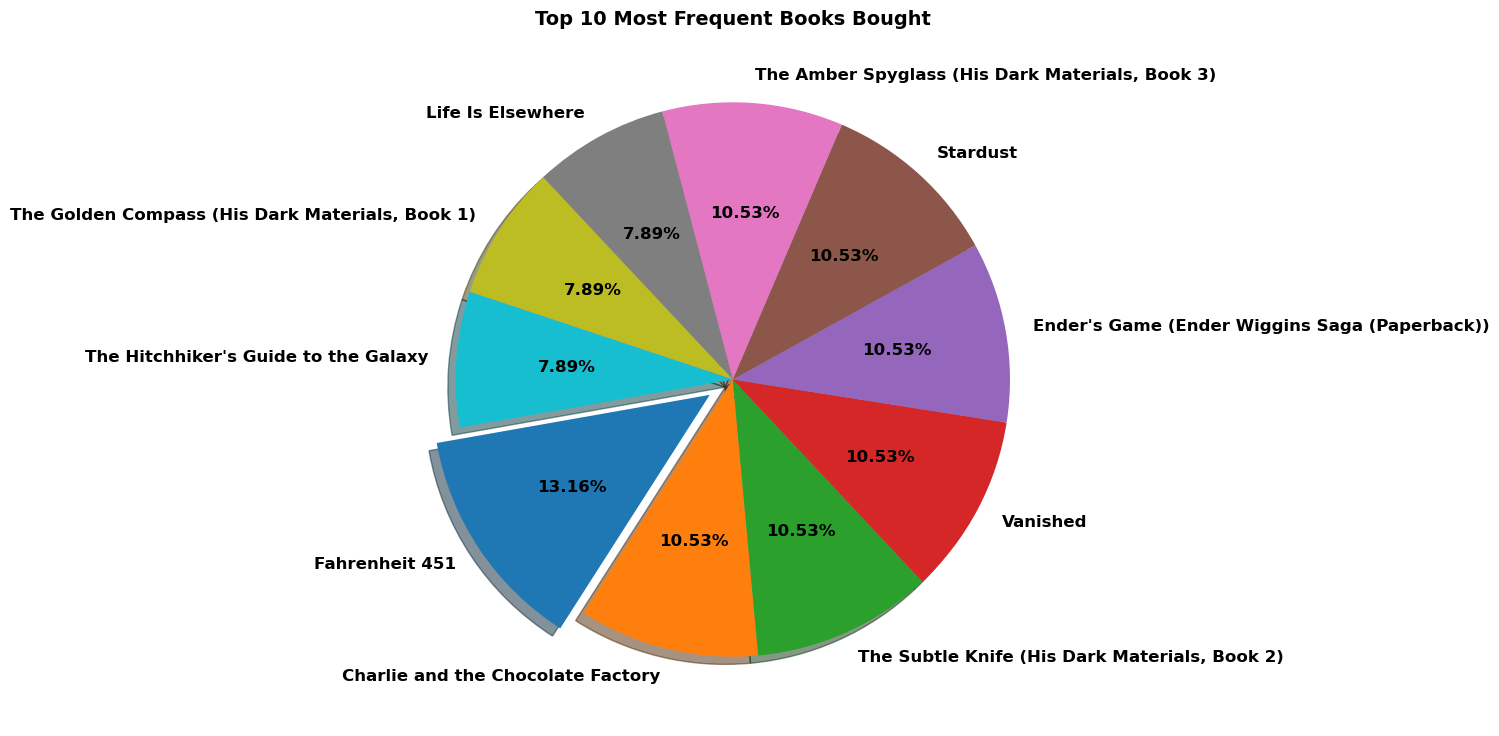

In [27]:
plt.figure(figsize = (16,9))
plt.pie(top_books,
       labels=top_books.index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Most Frequent Books Bought", fontsize = 14, fontweight = 'bold')
plt.show()

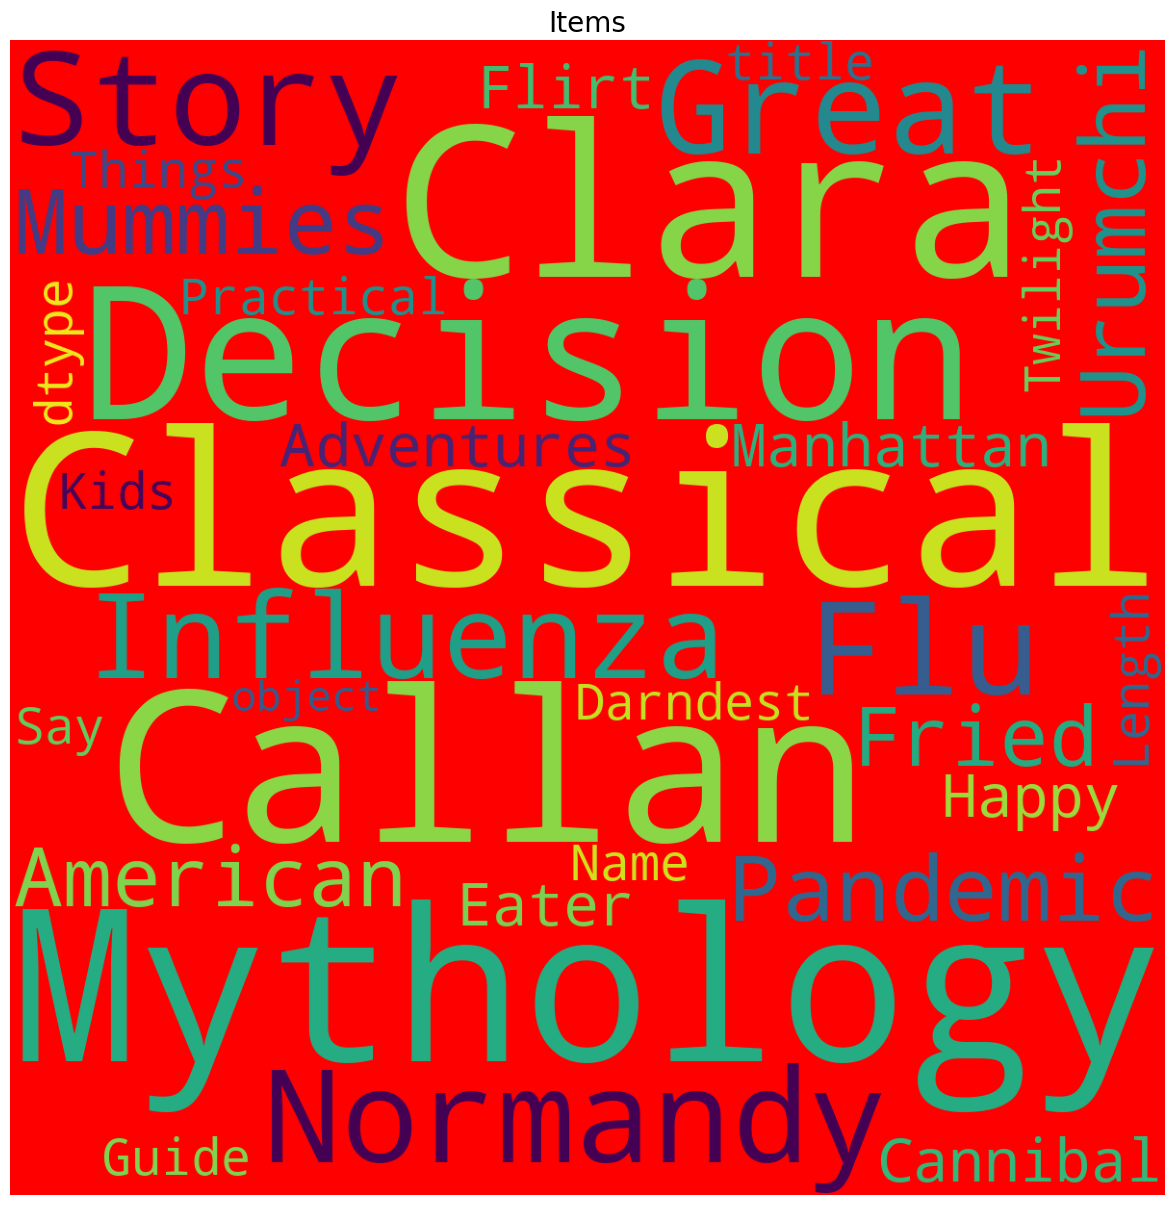

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'red', width = 1200,  height = 1200, max_words = 121).generate(str(books.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

## Creating Pivot Table 

In [ ]:
user_books_df = books.pivot_table(index='user_id',columns = 'title', values = 'rating').fillna(0)
user_books_df

In [ ]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [ ]:
ratings.sort_values('num of ratings',ascending=False).head(10)

In [ ]:
stardust_user_ratings = user_books_df['Stardust']
fahrenheit_user_rating = user_books_df['Fahrenheit 451']
fahrenheit_user_rating.head()

In [ ]:
similar_to_fahrenheit = user_books_df.corrwith(fahrenheit_user_rating)
similar_to_stardust = user_books_df.corrwith(stardust_user_ratings)

In [ ]:
corr_fahrenheit = pd.DataFrame(similar_to_fahrenheit,columns=['Correlation'])
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit.head()

In [ ]:
corr_fahrenheit.sort_values('Correlation',ascending=False).head(10)

In [ ]:
corr_fahrenheit = corr_fahrenheit.join(ratings['rating'])
corr_fahrenheit.head()

## Recommending Similar Books Using Correlation

In [ ]:
corr_fahrenheit[corr_fahrenheit['rating']>5].sort_values('Correlation',ascending=False).head()

In [ ]:
corr_stardust = pd.DataFrame(similar_to_stardust,columns=['Correlation'])
corr_stardust.dropna(inplace=True)
corr_stardust = corr_stardust.join(ratings['num of ratings'])
corr_stardust[corr_stardust['num of ratings']>4].sort_values('Correlation',ascending=False).head()

### Collaborative Filtering

In [ ]:
user_books_df.head()

In [ ]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [ ]:
user_sim = 1 - pairwise_distances(user_books_df.values, metric = 'cosine')
user_sim

In [ ]:
# Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

In [ ]:
user_sim_df.iloc[:5,:5]

In [ ]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

In [ ]:
# Set the index and column name to user Ids
user_sim_df.index = list(user_books_df.index)
user_sim_df.columns = list(user_books_df.index)
user_sim_df

In [ ]:
user_id_eight = user_sim_df.sort_values([9], ascending=False).head(100)
user_id_eight[9]

In [ ]:
books[(books['user_id']==8) | (books['user_id']==14)]

In [ ]:
# Most Similar Users
user_sim_df.idxmax(axis=1)

In [ ]:
books[(books['user_id']==8) | (books['user_id']==14)]

### Recommnedation Based on Cosine Similarity

In [ ]:
def give_reco(customer_id):
    tem = list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(books[books['user_id']==i]['title'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(books[books['user_id']==customer_id]['title'])

In [ ]:
give_reco(14)

In [ ]:
give_reco(8)